The quadratic function we'll plot is $$f(x) = ax^2 + bx + c$$, where `a`, `b`, and `c` are constants.
This code will plot the function $$f(x) = x^2 - 2x + 1$$ for $$x$$ in the range $$[-10, 10]$$



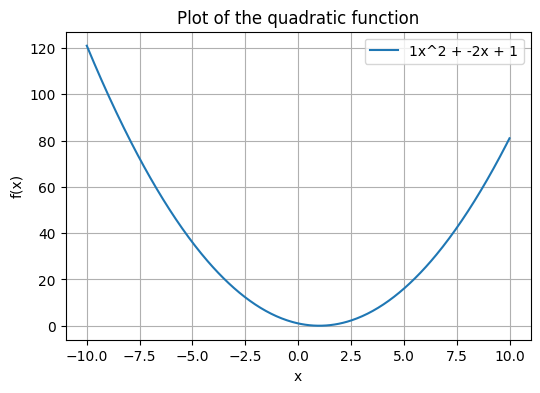

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import torch

# Define the quadratic function
def f(x, a, b, c):
    return a * x**2 + b * x + c

# Define the constants a, b, and c
a, b, c = 1, -2, 1  # This will plot the function f(x) = x^2 - 2x + 1

# Generate x values
x = np.linspace(-10, 10, 400)

# Generate y values
y = f(x, a, b, c)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=f'{a}x^2 + {b}x + {c}')
plt.title('Plot of the quadratic function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [15]:
# Create some dummy data for training and validation
# Define the quadratic function
def F(x, a, b, c):
    return a * x**2 + b * x + c

# Define the constants a, b, and c
a, b, c = 1, -2, 1  # This will plot the function f(x) = x^2 - 2x + 1

x_train = torch.randn(10000, 1)
y_train = F(x_train, a, b, c)
print(y_train.shape)

torch.Size([10000, 1])


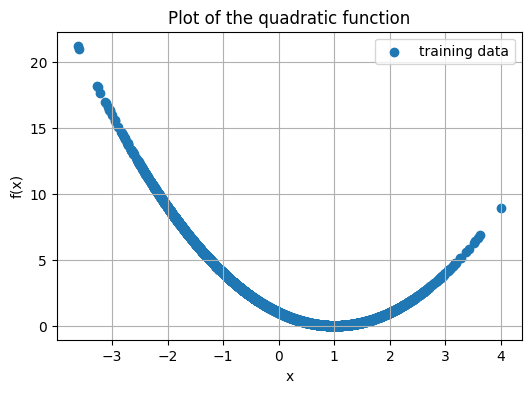

In [16]:
# Create the plot
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, label=f'training data')
plt.title('Plot of the quadratic function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Epoch 1, Loss: 1.7041343450546265, Val Loss: 3.323359489440918
Epoch 2, Loss: 1.0941879749298096, Val Loss: 2.133793592453003
Epoch 3, Loss: 0.7025230526924133, Val Loss: 1.3703017234802246
Epoch 4, Loss: 0.45117512345314026, Val Loss: 0.8805556893348694
Epoch 5, Loss: 0.2899986207485199, Val Loss: 0.5666365623474121
Epoch 6, Loss: 0.1867457777261734, Val Loss: 0.36561089754104614
Epoch 7, Loss: 0.12068338692188263, Val Loss: 0.23703759908676147
Epoch 8, Loss: 0.07848349958658218, Val Loss: 0.15493421256542206
Epoch 9, Loss: 0.051582060754299164, Val Loss: 0.10261295735836029
Epoch 10, Loss: 0.034478235989809036, Val Loss: 0.06936000287532806
Epoch 11, Loss: 0.023640578612685204, Val Loss: 0.048300109803676605
Epoch 12, Loss: 0.016803640872240067, Val Loss: 0.035023823380470276
Epoch 13, Loss: 0.012515398673713207, Val Loss: 0.026705782860517502
Epoch 14, Loss: 0.009846173226833344, Val Loss: 0.021537315100431442
Epoch 15, Loss: 0.008201630786061287, Val Loss: 0.018362125381827354
Epoc

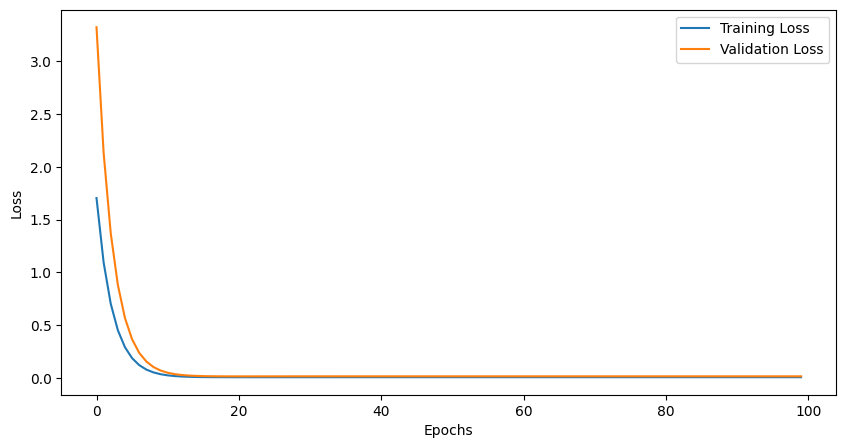

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1, 1)  # A simple linear layer

    def forward(self, x):
        return self.fc(x)

# Create the model
model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create some dummy data for training and validation
x_train = torch.randn(100, 1)
y_train = x_train ** 2 + torch.randn(100, 1) * 0.1 #80%
x_val = torch.randn(20, 1)
y_val = x_val ** 2 + torch.randn(20, 1) * 0.1  #20% validation

# Create data loaders
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=10)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=10)

# Prepare lists to save the losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(100):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_loss = sum(criterion(model(inputs), targets) for inputs, targets in val_loader)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Test input: 1.820870041847229, Test output: 3.6535887718200684


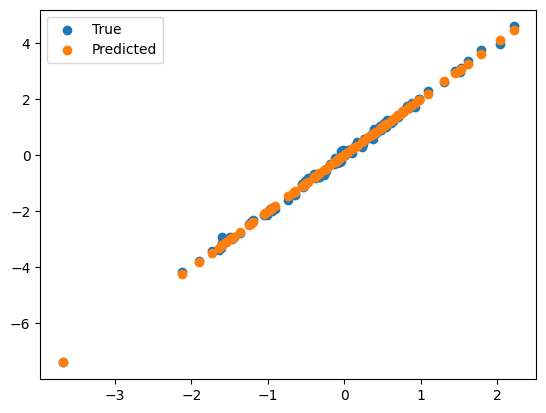

In [4]:
# Save the model
torch.save(model.state_dict(), 'model.pth')

# Load the model
model = Net()
model.load_state_dict(torch.load('model.pth'))

# Test the model
x_test = torch.randn(1, 1)
y_test = model(x_test)
print(f"Test input: {x_test.item()}, Test output: {y_test.item()}")

# Plot the model predictions against the true values
plt.scatter(x_train, y_train, label='True')
plt.scatter(x_train, model(x_train).detach(), label='Predicted')
plt.legend()
plt.show()

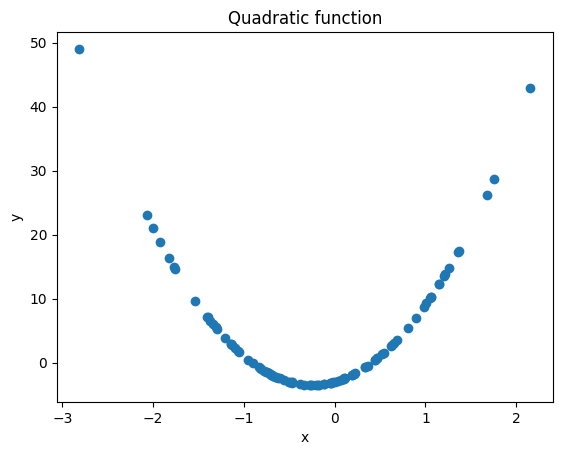

Epoch 0, Loss: 103.8975
Epoch 100, Loss: 6.7616
Epoch 200, Loss: 2.4578
Epoch 300, Loss: 1.2814
Epoch 400, Loss: 0.6880
Epoch 500, Loss: 0.4140
Epoch 600, Loss: 0.2600
Epoch 700, Loss: 0.1669
Epoch 800, Loss: 0.1069
Epoch 900, Loss: 0.0664


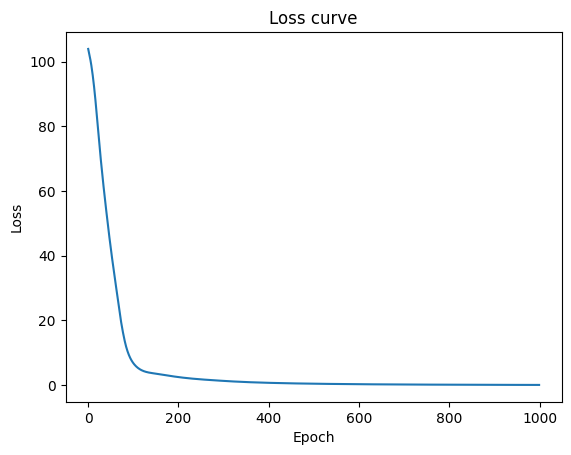

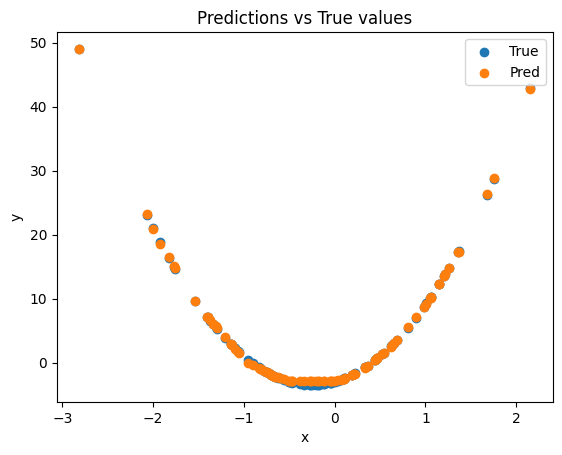

In [1]:
# Import PyTorch and other libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function y = 8x^2 + 4x - 3
def quadratic(x):
  return 8 * x**2 + 4 * x - 3

# Generate some random data points for x and y
x = torch.randn(100, 1) # 100 samples of x
y = quadratic(x) # corresponding y values

# Plot the data points
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic function')
plt.show()

# Define a neural network model with two hidden layers
model = nn.Sequential(
  nn.Linear(1, 10), # input layer
  nn.ReLU(), # activation function
  nn.Linear(10, 10), # hidden layer
  nn.ReLU(), # activation function
  nn.Linear(10, 1) # output layer
)

# Define a loss function and an optimizer
loss_fn = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer

# Train the model for 1000 epochs
epochs = 1000
losses = [] # to store the loss values
for epoch in range(epochs):
  # Forward pass
  y_pred = model(x) # predict y from x
  loss = loss_fn(y_pred, y) # compute the loss
  losses.append(loss.item()) # store the loss value

  # Backward pass and update
  optimizer.zero_grad() # clear the gradients
  loss.backward() # compute the gradients
  optimizer.step() # update the parameters

  # Print the loss every 100 epochs
  if epoch % 100 == 0:
    print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

# Plot the predictions and the true values
plt.scatter(x, y, label='True')
plt.scatter(x, y_pred.detach(), label='Pred')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs True values')
plt.legend()
plt.show()


In [13]:
# import the required packages
import torch
from torch import Tensor
from torch.nn import Linear, MSELoss, functional as F
from torch.optim import SGD, Adam, RMSprop
from torch.autograd import Variable
import numpy as np
# define our data generation function
def data_generator(data_size=50):
    # f(x) = y = 8x^2 + 4x - 3
    inputs = []
    labels = []
    
    # loop data_size times to generate the data
    for ix in range(data_size):
        
        # generate a random number between 0 and 1000
        x = np.random.randint(1000) / 1000
        
        # calculate the y value using the function 8x^2 + 4x - 3
        y = 8*(x*x) + (4*x) - 3
        
        # append the values to our input and labels lists
        inputs.append([x])
        labels.append([y])
        
    return inputs, labels

# define the model 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = Linear(1, 6)
        self.fc2 = Linear(6, 6)
        self.fc3 = Linear(6, 1)
        
    def forward(self, x):
        x = F.dropout(F.relu(self.fc1(x)), p=0.5)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()
# define the loss function
critereon = MSELoss()
# define the optimizer
optimizer = SGD(model.parameters(), lr=0.01)

# define the number of epochs and the data set size
nb_epochs = 200
data_size = 1000
# create our training loop
for epoch in range(nb_epochs):
    X, y = data_generator(data_size)
    
    epoch_loss = 0;
    
    for ix in range(data_size):
        y_pred = model(Variable(Tensor(X[ix])))
    
        loss = critereon(y_pred, Variable(Tensor(y[ix]), requires_grad=False))
        
        epoch_loss = loss.item()
    
        optimizer.zero_grad()
    
        loss.backward()
    
        optimizer.step()
    
    print("Epoch: {} Loss: {}".format(epoch, epoch_loss))
#test the model
model.eval()
test_data = data_generator(1)
prediction = model(Variable(Tensor(test_data[0][0])))
print("Prediction: {}".format(prediction.data[0]))
print("Expected: {}".format(test_data[1][0]))

Epoch: 0 Loss: 1.1892331838607788
Epoch: 1 Loss: 10.49563980102539
Epoch: 2 Loss: 5.861527442932129
Epoch: 3 Loss: 1.394706130027771
Epoch: 4 Loss: 0.6094706654548645
Epoch: 5 Loss: 9.6266450881958
Epoch: 6 Loss: 0.8183605074882507
Epoch: 7 Loss: 1.144545316696167
Epoch: 8 Loss: 4.4203090510563925e-05
Epoch: 9 Loss: 0.12273711711168289
Epoch: 10 Loss: 0.00018960262241307646
Epoch: 11 Loss: 0.008492100983858109
Epoch: 12 Loss: 1.1820744276046753
Epoch: 13 Loss: 0.12469026446342468
Epoch: 14 Loss: 0.22198522090911865
Epoch: 15 Loss: 0.026632962748408318
Epoch: 16 Loss: 0.002831826452165842
Epoch: 17 Loss: 1.187268853187561
Epoch: 18 Loss: 1.7467732429504395
Epoch: 19 Loss: 2.097151309499168e-06
Epoch: 20 Loss: 0.3123514950275421
Epoch: 21 Loss: 0.15257978439331055
Epoch: 22 Loss: 5.537896633148193
Epoch: 23 Loss: 0.013711572624742985
Epoch: 24 Loss: 0.11650579422712326
Epoch: 25 Loss: 0.0990639328956604
Epoch: 26 Loss: 8.009242057800293
Epoch: 27 Loss: 7.709146976470947
Epoch: 28 Loss: 0